# Import libraries

In [1]:
# import required libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#set the path of training image and testing images
training_data_folder_path = 'dataset/training-data'
test_data_folder_path = 'dataset/test-data'

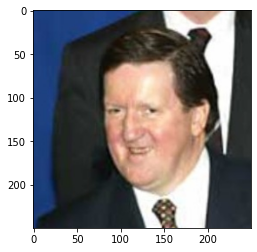

In [58]:
#read a sample training image
random_image = cv2.imread('dataset/training-data/2/George_Robertson_0001.jpg')
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Image from category 1')# change category name accordingly

# show a sample training image
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

# face detection

In [59]:
# set the path of harcascade pretrained model for face detection
haarcascade_frontalface = 'opencv_xml_files/ haarcascade_frontalface.xml'

In [60]:
# define a function to detect faces of training images
def detect_face(input_img):
    
    #Convert RGB image to grayscale image
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    
    # Load pretrained haar-cascade model for face detection
    face_cascade = cv2.CascadeClassifier('opencv_xml_files/haarcascade_frontalface.xml')
    
    #detect face of input image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    
    #if loop to check if any face is detected
    if (len(faces) == 0):
        return -1, -1
    
    # determine the coordinates of bounding box of detected face
    (x, y, w, h) = faces[0]
    
    #return the face and boubnding box on rectangle
    return image[y:y+w, x:x+h], faces[0]

# prepare training dataset

In [61]:
#defines a function for training preparation
def prepare_training_data(training_data_folder_path):
    
    #define two emplty lists to store the detected faces and their labels
    detected_faces = []
    face_labels = []
    
    #access the list of folders or directories of training images inside the training images folder
    traning_image_dirs = os.listdir(training_data_folder_path)
    
    # iterate through the list of training folders
    for dir_name in traning_image_dirs:
        #set the label or category of images, actually folder names are the labels of images
        label = int(dir_name)
        #set the path of the each folder of training images
        training_image_path = training_data_folder_path + "/" + dir_name
        #get the list of names of the training images
        training_images_names = os.listdir(training_image_path)
        
        #iterate through the list of names of training images
        for image_name in training_images_names:
            #get the path of each image
            image_path = training_image_path  + "/" + image_name
            #read each train image 
            image = cv2.imread(image_path)
            #detect the face of each image
            face, rect = detect_face(image)
            
            if face is not -1:
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                detected_faces.append(resized_face)
                face_labels.append(label)

    #return the detected faces and their labels
    return detected_faces, face_labels

<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\HP\AppData\Local\Temp\ipykernel_18240\806356172.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face is not -1:


In [62]:
#detect face images and their labels
detected_faces, face_labels = prepare_training_data("dataset/training-data")

In [63]:
#prints the total number of training images and labels or categories
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  105
Total labels:  105


# initialize a face recognizer

In [64]:
#OpenCV is equipped with face recognizer modules
#So, we use the Eigenfaces recognizer module from OpenCV
eigenfaces_recognizer = cv2.face.EigenFaceRecognizer_create()

# train the face recognizer model

In [65]:
#Now, train the face recognizer model
#but convert the labels into a numpy array before passing it into the recognizer
#OpenCV expects labels as NumPy array
eigenfaces_recognizer.train(detected_faces, np.array(face_labels))

In [66]:
#define the draw_rectangle function which will hepl us to draw rectangle around predicted face by the above model
def draw_rectangle(test_image, rect):
    #Coordinates of rectangle
    (x, y, w, h) = rect
    #draw rectangle on predicted image
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

#define draw_text function which will help us to write label of predicted face image by the model
def draw_text(test_image, label_text, x, y):
    #write predicted label on face image
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

# predict output on test data

In [67]:
#define a predict function
def predict(test_image):
    #detect face and rectangle by calling detect_face function
    detected_face, rect = detect_face(test_image)
    #resize detected face by 120x120
    resized_test_image = cv2.resize(detected_face, (121,121), interpolation = cv2.INTER_AREA)
    #get the predicted label
    label= eigenfaces_recognizer.predict(resized_test_image)
    label_text = tags[label[0]]
    #Use the draw_rectangle function to draw a green rectangular box around the face using the four coordinates obtained during face detection
    draw_rectangle(test_image, rect)
    #call the write_text function to write the predicted category of the image
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [68]:
#actual labels of image
tags = ['0', '1', '2', '3', '4']

In [69]:
#Now, we will test the model with test images
#In this step, we will first read a test image
test_image = cv2.imread("dataset/test-data/1/Alvaro_Uribe_0021.jpg")

In [70]:
#call the test image and its predicted label
predicted_image, label = predict(test_image)

# Output

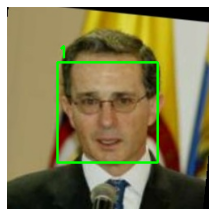

In [71]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
plt.axis("off")
#show the test image and its predicted label
plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()